# Etapa 2: Análisis exploratorio de los datos

<p align="justify"> En esta segunda etapa se realizará una exploración de los datos procesados en la etapa anterior y se realizaran los primeros análisis de los datos obtenidos. La exploración y el análisis iran acompañados de visualizaciones y tablas que ayuden a describir y comprender los diferentes datos. El análisis detallado de la supervivencia se realizará en próximas etapas.

In [146]:
# Importamos módulos necesarios.
import pandas as pd
import numpy as np
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from tableone import TableOne

from src.utils import read_data

# Aplicamos configuración sobre la visualización de los DataFrames.
pd.set_option('future.no_silent_downcasting', True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sns.set_theme()

# Ruta de los archivos de origen.
input_path = '../data/processed/'
table_path = '../outputs/tables'
figure_path = '../outputs/figures'

In [147]:
# Carga de todos los datos.
demographic = read_data(f'{input_path}demographic.csv')
diagnosis_prior = read_data(f'{input_path}diagnosis_prior.csv')
diagnosis_primary = read_data(f'{input_path}diagnosis_primary.csv')
diagnosis_other = read_data(f'{input_path}diagnosis_other.csv')
diagnosis_type = read_data(f'{input_path}diagnosis_type.csv')
treatment_ebrt = read_data(f'{input_path}treatment_ebrt.csv')
treatment_chemo = read_data(f'{input_path}treatment_chemo.csv')
treatment_type = read_data(f'{input_path}treatment_type.csv')
mutation_gene = read_data(f'{input_path}mutation_gene.csv')

## 1. Análisis exploratorio de demographic

<p align="justify">Se inicia el análisis con los datos demográficos. A través de visualizaciones y tablas se observa la distribución de los datos y se decriben las variables.

In [148]:
# Muestra de los datos.
demographic.head()

,Patient Id,Age,Country Of Residence,Ethnicity,Gender,Race,Diabetes,Chronic Pancreatitis,Alcohol History,Alcohol Intensity,Tobacco Smoking Status,Relative With Cancer,Relative Cancer Type,Vital Status,Overall Survival
0,TCGA-IB-7897,53,Canada,not hispanic or latino,female,white,No,No,Yes,Social Drinker,"Current Reformed Smoker, Duration Not Specified",yes,Melanoma,1,486
1,TCGA-HZ-8315,54,United States,not hispanic or latino,female,white,No,No,NaN,NaN,NaN,NaN,NaN,1,299
2,TCGA-HZ-8636,58,United States,not hispanic or latino,female,white,No,No,NaN,NaN,NaN,NaN,NaN,1,545
3,TCGA-IB-7888,66,Canada,not hispanic or latino,female,black or african american,No,No,NaN,NaN,NaN,NaN,NaN,1,1332
4,TCGA-IB-7893,64,Canada,not hispanic or latino,male,white,Yes,No,Yes,Social Drinker,Current Reformed Smoker for > 15 yrs,yes,Cancer,1,117


## 1.1 Datos demográficos

<p align="justify">

In [149]:
df = demographic.copy()
df['Vital Status'] = df['Vital Status'].replace({0: 'Dead', 1: 'Alive'})

columns = ['Age', 'Gender', 'Ethnicity', 'Race', 'Country Of Residence',
           'Vital Status', 'Overall Survival']
continuous = ['Age', 'Overall Survival']

table_demographic = TableOne(df, columns=columns, continuous=continuous,
                             pval=False, missing=False, nonnormal=['Age', 'Overall Survival'],
                             min_max=['Age', 'Overall Survival'])
table_demographic.to_csv(f'{table_path}/demographic.csv')

print(table_demographic.tabulate(tablefmt="fancy_grid"))

╒════════════════════════════════════╤═══════════════════════════╤════════════════════╕
│                                    │                           │ Overall            │
╞════════════════════════════════════╪═══════════════════════════╪════════════════════╡
│ n                                  │                           │ 185                │
├────────────────────────────────────┼───────────────────────────┼────────────────────┤
│ Age, median [min,max]              │                           │ 65.0 [35.0,88.0]   │
├────────────────────────────────────┼───────────────────────────┼────────────────────┤
│ Gender, n (%)                      │ female                    │ 83 (44.9)          │
├────────────────────────────────────┼───────────────────────────┼────────────────────┤
│                                    │ male                      │ 102 (55.1)         │
├────────────────────────────────────┼───────────────────────────┼────────────────────┤
│ Ethnicity, n (%)              

In [150]:
pg.normality(demographic['Age'])

,W,pval,normal
Age,0.984399,0.037477,False


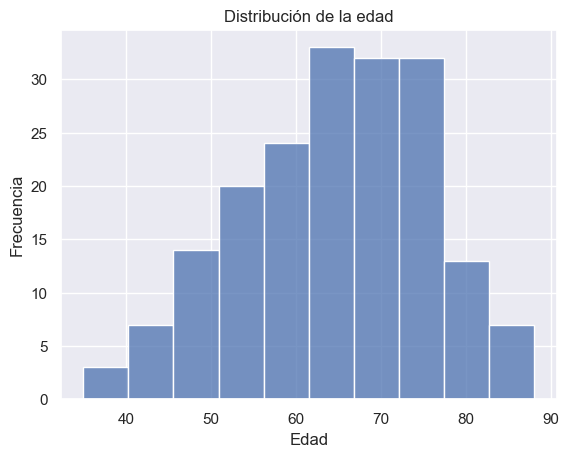

In [151]:
sns.histplot(data=demographic, x='Age')

plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.savefig(f'{figure_path}/age.png')

plt.show()

## 1.2 Datos de comorbilidades

<p align="justify">

In [152]:
columns = ['Diabetes', 'Chronic Pancreatitis']

table_comorbidities = TableOne(demographic, columns=columns, pval=False,
                               missing=False)

table_comorbidities.to_csv(f'{table_path}/comorbidities.csv')

print(table_comorbidities.tabulate(tablefmt="fancy_grid"))

╒═════════════════════════════╤═════╤════════════╕
│                             │     │ Overall    │
╞═════════════════════════════╪═════╪════════════╡
│ n                           │     │ 185        │
├─────────────────────────────┼─────┼────────────┤
│ Diabetes, n (%)             │ No  │ 147 (79.5) │
├─────────────────────────────┼─────┼────────────┤
│                             │ Yes │ 38 (20.5)  │
├─────────────────────────────┼─────┼────────────┤
│ Chronic Pancreatitis, n (%) │ No  │ 172 (93.0) │
├─────────────────────────────┼─────┼────────────┤
│                             │ Yes │ 13 (7.0)   │
╘═════════════════════════════╧═════╧════════════╛


## 1.3 Datos de antecedentes familiares

<p align="justify">

In [153]:
columns = ['Relative With Cancer',	'Relative Cancer Type']

table_family = TableOne(demographic, columns=columns, pval=False,
                        missing=False)

table_family.to_csv(f'{table_path}/family.csv')

print(table_family.tabulate(tablefmt="fancy_grid"))

╒═════════════════════════════╤═════════════════╤════════════╕
│                             │                 │ Overall    │
╞═════════════════════════════╪═════════════════╪════════════╡
│ n                           │                 │ 185        │
├─────────────────────────────┼─────────────────┼────────────┤
│ Relative With Cancer, n (%) │ None            │ 72 (38.9)  │
├─────────────────────────────┼─────────────────┼────────────┤
│                             │ no              │ 47 (25.4)  │
├─────────────────────────────┼─────────────────┼────────────┤
│                             │ yes             │ 66 (35.7)  │
├─────────────────────────────┼─────────────────┼────────────┤
│ Relative Cancer Type, n (%) │ Breast Cancer   │ 6 (3.2)    │
├─────────────────────────────┼─────────────────┼────────────┤
│                             │ Cancer          │ 44 (23.8)  │
├─────────────────────────────┼─────────────────┼────────────┤
│                             │ Melanoma        │ 2 (1.

## 1.4 Datos de exposición a sustancias

<p align="justify">

In [154]:
demographic['Alcohol Intensity'].unique()

array(['Social Drinker', nan, 'Non-Drinker', 'Heavy Drinker', 'Drinker',
       'Occasional Drinker'], dtype=object)

In [155]:
columns = ['Alcohol History', 'Alcohol Intensity', 'Tobacco Smoking Status']

demographic['Alcohol Intensity'] = pd.Categorical(demographic['Alcohol Intensity'],
                                                  categories=['Non-Drinker',
                                                              'Occasional Drinker',
                                                              'Social Drinker',
                                                              'Drinker',
                                                              'Heavy Drinker'],
                                                  ordered=True)

table_exposure = TableOne(demographic, columns=columns, pval=False,
                          missing=False)

table_exposure.to_csv(f'{table_path}/exposure.csv')

print(table_exposure.tabulate(tablefmt="fancy_grid"))

╒═══════════════════════════════╤═════════════════════════════════════════════════╤═══════════╕
│                               │                                                 │ Overall   │
╞═══════════════════════════════╪═════════════════════════════════════════════════╪═══════════╡
│ n                             │                                                 │ 185       │
├───────────────────────────────┼─────────────────────────────────────────────────┼───────────┤
│ Alcohol History, n (%)        │ No                                              │ 29 (15.7) │
├───────────────────────────────┼─────────────────────────────────────────────────┼───────────┤
│                               │ None                                            │ 86 (46.5) │
├───────────────────────────────┼─────────────────────────────────────────────────┼───────────┤
│                               │ Yes                                             │ 70 (37.8) │
├───────────────────────────────┼───────

## 2. Análisis exploratorio de diagnosis_prior

In [156]:
# Muestra de los datos.
diagnosis_prior.head()

,Patient Id,Primary Diagnosis,Tissue Or Organ Of Origin
0,TCGA-HZ-7289,Carcinoma,Skin
1,TCGA-F2-A44G,Infiltrating Duct Carcinoma,Breast
2,TCGA-3A-A9IL,Adenoma,Pituitary Gland
3,TCGA-3A-A9IL,Melanoma,Lower Limb
4,TCGA-IB-A5SS,Basal Cell Carcinoma,Skin


In [157]:
diagnosis_prior['Primary Diagnosis'].unique()

array(['Carcinoma', 'Infiltrating Duct Carcinoma', 'Adenoma', 'Melanoma',
       'Basal Cell Carcinoma', 'Squamous Cell Carcinoma',
       'Intraductal Carcinoma Noninfiltrating', 'Clear Cell Carcinoma',
       nan, 'Basaloid Squamous Cell Carcinoma', 'Adenocarcinoma',
       'Transitional Cell Carcinoma', 'Neoplasm'], dtype=object)

In [158]:
columns = ['Primary Diagnosis', 'Tissue Or Organ Of Origin']

table_diagnosis_prior = TableOne(diagnosis_prior, columns=columns,
                                 pval=False, missing=False)

table_diagnosis_prior.to_csv(f'{table_path}/diagnosis_prior.csv')

print(table_diagnosis_prior.tabulate(tablefmt="fancy_grid"))

╒══════════════════════════════════╤═══════════════════════════════════════╤═══════════╕
│                                  │                                       │ Overall   │
╞══════════════════════════════════╪═══════════════════════════════════════╪═══════════╡
│ n                                │                                       │ 23        │
├──────────────────────────────────┼───────────────────────────────────────┼───────────┤
│ Primary Diagnosis, n (%)         │ Adenocarcinoma                        │ 2 (8.7)   │
├──────────────────────────────────┼───────────────────────────────────────┼───────────┤
│                                  │ Adenoma                               │ 1 (4.3)   │
├──────────────────────────────────┼───────────────────────────────────────┼───────────┤
│                                  │ Basal Cell Carcinoma                  │ 3 (13.0)  │
├──────────────────────────────────┼───────────────────────────────────────┼───────────┤
│                    

## 3. Análisis exploratorio de diagnosis_primary

In [159]:
# Muestra de los datos.
diagnosis_primary.head()

,Patient Id,Ajcc Pathologic Stage,Ajcc Pathologic T,Ajcc Pathologic N,Ajcc Pathologic M,Primary Diagnosis,Residual Disease,Sites Of Involvement,Tumor Grade,Year Of Diagnosis,Lymph Nodes Positive,Maximum Tumor Diameter (cm),Ajcc Pathologic N 8th,Ajcc Pathologic T 8th,Ajcc Pathologic Stage 8th,Gene Mutations
0,TCGA-IB-7897,Estadio II,T3,N1,M0,Adenocarcinoma Ductal,R0,Cabeza,G2,2008.0,2.0,3.5,N1,T2,Estadio II,NaN
1,TCGA-HZ-8315,Estadio II,T3,N0,MX,Adenocarcinoma Ductal,R1,Cabeza,G2,2012.0,0.0,6.0,N0,T3,Estadio II,NaN
2,TCGA-HZ-8636,Estadio IV,T3,N0,M1,Adenocarcinoma Ductal,R1,Cuerpo/Cola,G3,2012.0,0.0,9.0,N0,T3,Estadio IV,NaN
3,TCGA-IB-7888,Estadio II,T3,N0,M0,Adenocarcinoma Ductal,R0,Cabeza,G2,2008.0,0.0,3.0,N0,T2,Estadio I,NaN
4,TCGA-IB-7893,Estadio II,T3,N0,M0,Adenocarcinoma Ductal,R0,Cuerpo/Cola,G3,2009.0,0.0,7.0,N0,T3,Estadio II,NaN


In [160]:
columns = ['Ajcc Pathologic Stage', 'Ajcc Pathologic T', 'Ajcc Pathologic N',
           'Ajcc Pathologic M']

table_diagnosis_primary1 = TableOne(diagnosis_primary, columns=columns,
                                   pval=False, missing=False)

table_diagnosis_primary1.to_csv(f'{table_path}/diagnosis_primary.csv')

print(table_diagnosis_primary1.tabulate(tablefmt="fancy_grid"))

╒══════════════════════════════╤═════════════╤════════════╕
│                              │             │ Overall    │
╞══════════════════════════════╪═════════════╪════════════╡
│ n                            │             │ 185        │
├──────────────────────────────┼─────────────┼────────────┤
│ Ajcc Pathologic Stage, n (%) │ Estadio I   │ 21 (11.4)  │
├──────────────────────────────┼─────────────┼────────────┤
│                              │ Estadio II  │ 152 (82.2) │
├──────────────────────────────┼─────────────┼────────────┤
│                              │ Estadio III │ 4 (2.2)    │
├──────────────────────────────┼─────────────┼────────────┤
│                              │ Estadio IV  │ 5 (2.7)    │
├──────────────────────────────┼─────────────┼────────────┤
│                              │ None        │ 3 (1.6)    │
├──────────────────────────────┼─────────────┼────────────┤
│ Ajcc Pathologic T, n (%)     │ None        │ 1 (0.5)    │
├──────────────────────────────┼────────

In [161]:
columns = ['Ajcc Pathologic Stage 8th', 'Ajcc Pathologic T 8th', 'Ajcc Pathologic N 8th']

table_diagnosis_primary2 = TableOne(diagnosis_primary, columns=columns,
                                   pval=False, missing=False)

table_diagnosis_primary2.to_csv(f'{table_path}/diagnosis_primary2.csv')

print(table_diagnosis_primary2.tabulate(tablefmt="fancy_grid"))

╒══════════════════════════════════╤═════════════╤════════════╕
│                                  │             │ Overall    │
╞══════════════════════════════════╪═════════════╪════════════╡
│ n                                │             │ 185        │
├──────────────────────────────────┼─────────────┼────────────┤
│ Ajcc Pathologic Stage 8th, n (%) │ Estadio I   │ 34 (18.4)  │
├──────────────────────────────────┼─────────────┼────────────┤
│                                  │ Estadio II  │ 89 (48.1)  │
├──────────────────────────────────┼─────────────┼────────────┤
│                                  │ Estadio III │ 57 (30.8)  │
├──────────────────────────────────┼─────────────┼────────────┤
│                                  │ Estadio IV  │ 5 (2.7)    │
├──────────────────────────────────┼─────────────┼────────────┤
│ Ajcc Pathologic T 8th, n (%)     │ T1          │ 12 (6.5)   │
├──────────────────────────────────┼─────────────┼────────────┤
│                                  │ T2 

In [162]:
columns = ['Residual Disease', 'Tumor Grade']

table_diagnosis_primary3 = TableOne(diagnosis_primary, columns=columns,
                                   pval=False, missing=False)

table_diagnosis_primary3.to_csv(f'{table_path}/diagnosis_primary3.csv')

print(table_diagnosis_primary3.tabulate(tablefmt="fancy_grid"))

╒═════════════════════════╤══════╤════════════╕
│                         │      │ Overall    │
╞═════════════════════════╪══════╪════════════╡
│ n                       │      │ 185        │
├─────────────────────────┼──────┼────────────┤
│ Residual Disease, n (%) │ None │ 12 (6.5)   │
├─────────────────────────┼──────┼────────────┤
│                         │ R0   │ 111 (60.0) │
├─────────────────────────┼──────┼────────────┤
│                         │ R1   │ 53 (28.6)  │
├─────────────────────────┼──────┼────────────┤
│                         │ R2   │ 5 (2.7)    │
├─────────────────────────┼──────┼────────────┤
│                         │ RX   │ 4 (2.2)    │
├─────────────────────────┼──────┼────────────┤
│ Tumor Grade, n (%)      │ G1   │ 32 (17.3)  │
├─────────────────────────┼──────┼────────────┤
│                         │ G2   │ 97 (52.4)  │
├─────────────────────────┼──────┼────────────┤
│                         │ G3   │ 51 (27.6)  │
├─────────────────────────┼──────┼──────

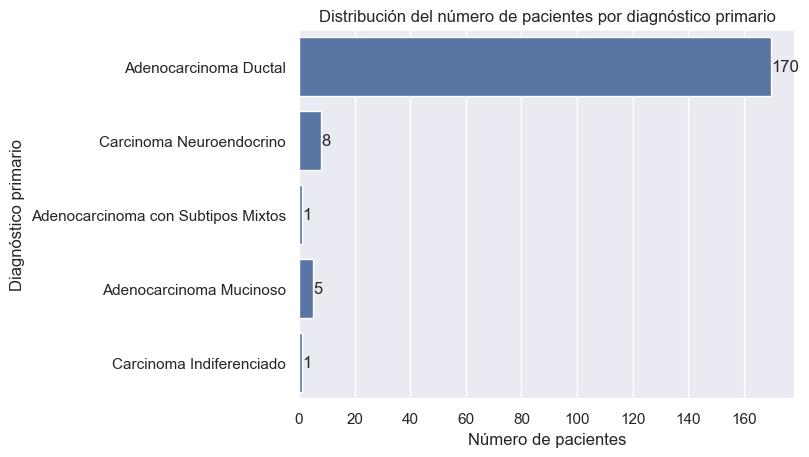

In [163]:
ax = sns.countplot(data=diagnosis_primary, y='Primary Diagnosis')
ax.bar_label(ax.containers[0])
plt.title('Distribución del número de pacientes por diagnóstico primario')
plt.xlabel('Número de pacientes')
plt.ylabel('Diagnóstico primario')
plt.show()

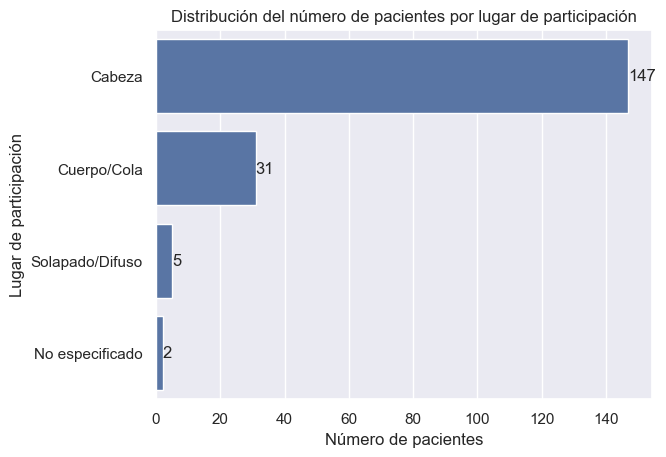

In [164]:
ax = sns.countplot(data=diagnosis_primary, y='Sites Of Involvement')
ax.bar_label(ax.containers[0])
plt.title('Distribución del número de pacientes por lugar de participación')
plt.xlabel('Número de pacientes')
plt.ylabel('Lugar de participación')
plt.show()

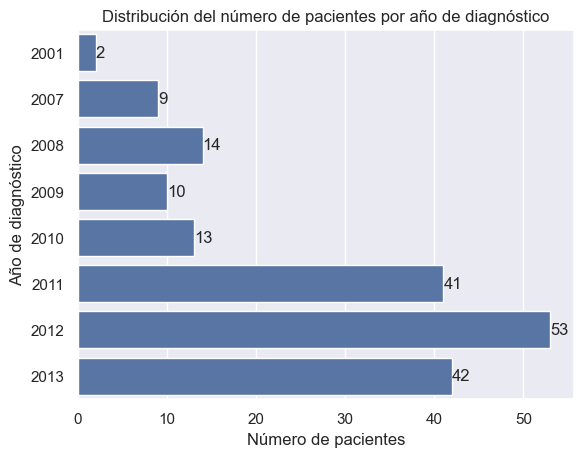

In [165]:
ax = sns.countplot(data=diagnosis_primary, y='Year Of Diagnosis')
labels = [2001, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
plt.yticks(labels=labels, ticks=range(8))
ax.bar_label(ax.containers[0])
plt.title('Distribución del número de pacientes por año de diagnóstico')
plt.xlabel('Número de pacientes')
plt.ylabel('Año de diagnóstico')
plt.show()

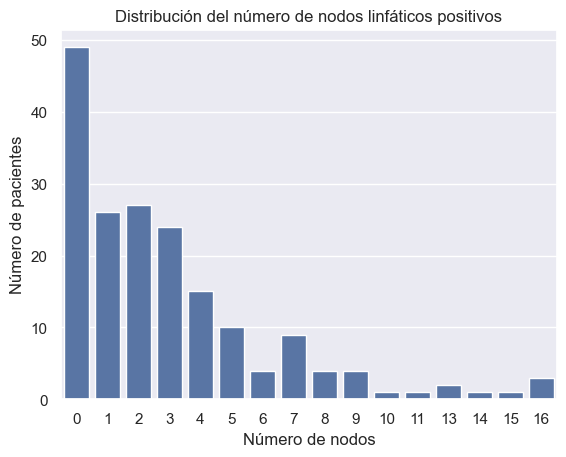

In [166]:
sns.countplot(data=diagnosis_primary, x='Lymph Nodes Positive')
labels = [0, 1, 2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10, 11, 13, 14, 15, 16]
plt.xticks(labels=labels, ticks=range(16))
plt.title('Distribución del número de nodos linfáticos positivos')
plt.xlabel('Número de nodos')
plt.ylabel('Número de pacientes')
plt.show()

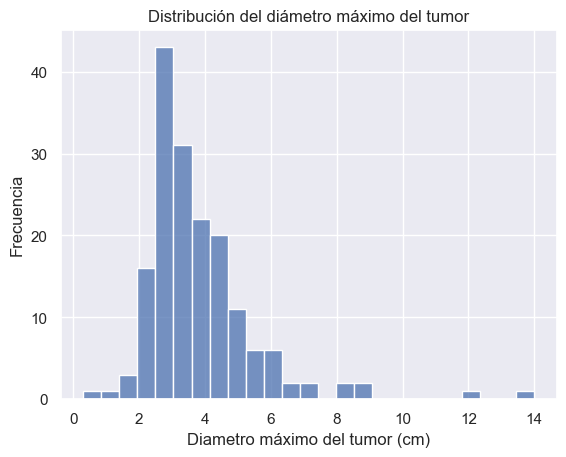

In [167]:
sns.histplot(data=diagnosis_primary, x='Maximum Tumor Diameter (cm)')
plt.title('Distribución del diámetro máximo del tumor')
plt.xlabel('Diametro máximo del tumor (cm)')
plt.ylabel('Frecuencia')
plt.show()

In [168]:
df_etapas = diagnosis_primary[['Ajcc Pathologic Stage', 'Ajcc Pathologic Stage 8th']].copy()

df_etapas['Stage_7th'] = df_etapas['Ajcc Pathologic Stage'].astype(str) + ' (7th Ed.)'
df_etapas['Stage_8th'] = df_etapas['Ajcc Pathologic Stage 8th'].astype(str) + ' (8th Ed.)'

df_flujo = df_etapas.groupby(['Stage_7th', 'Stage_8th']).size().reset_index(name='Value')
df_flujo.rename(columns={'Stage_7th': 'Source', 'Stage_8th': 'Target'}, inplace=True)

all_nodes = list(pd.concat([df_flujo['Source'], df_flujo['Target']]).unique())

node_map = {name: i for i, name in enumerate(all_nodes)}

source_indices = df_flujo['Source'].map(node_map).tolist()
target_indices = df_flujo['Target'].map(node_map).tolist()
values = df_flujo['Value'].tolist()

totales_source = df_flujo.groupby('Source')['Value'].sum()
totales_target = df_flujo.groupby('Target')['Value'].sum()
totales = totales_source.add(totales_target, fill_value=0)

node_labels = [
    f"{name.replace(' (7th Ed.)','').replace(' (8th Ed.)','')}\n(n={int(totales.get(name, 0))})"
    for name in all_nodes]

fig = go.Figure(data=[go.Sankey(node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5),
                                          label=node_labels, hovertemplate='Nodo: %{label}<extra></extra>'),
                                link=dict(source=source_indices, target=target_indices, value=values,
                                          hovertemplate='Flujo: %{source.label} -> %{target.label}<br>Pacientes: %{value}<extra></extra>'))])

fig.update_layout(title_text="Reclasificación de Estadios Patológicos (7ª Edición a 8ª Edición)",
    font=dict(size=10, color='black'), width=800, height=600,
    annotations=[dict(xref='paper', yref='paper', x=0.05, y=1.05, text='Estadios - 7ª Edición',
                      showarrow=False, font=dict(size=12, color='blue')),
        dict(xref='paper', yref='paper', x=0.95, y=1.05, text='Estadios - 8ª Edición',
            showarrow=False,font=dict(size=12, color='red'))])

fig.show()

## 4. Análisis exploratorio de diagnosis_other

In [169]:
# Muestra de los datos.
diagnosis_other[diagnosis_other['Patient Id'] == 'TCGA-S4-A8RO']

,Patient Id,Diagnosis Type,Tissue Or Organ Of Origin
72,TCGA-S4-A8RO,metastasis,Lymph Node
73,TCGA-S4-A8RO,metastasis,Lung
74,TCGA-S4-A8RO,metastasis,Liver


In [170]:
columns = ['Tissue Or Organ Of Origin']
df = diagnosis_other[diagnosis_other['Diagnosis Type'].isin(['metastasis', 'recurrence'])].copy()

table_diagnosis_other = TableOne(df, columns=columns, groupby='Diagnosis Type',
                                pval=False, missing=False)

table_diagnosis_other.to_csv(f'{table_path}/diagnosis_other.csv')

print(table_diagnosis_other.tabulate(tablefmt="fancy_grid"))

╒══════════════════════════════════╤═════════════════════════════════════════════════╤═══════════╤══════════════╤══════════════╕
│                                  │                                                 │ Overall   │ metastasis   │ recurrence   │
╞══════════════════════════════════╪═════════════════════════════════════════════════╪═══════════╪══════════════╪══════════════╡
│ n                                │                                                 │ 95        │ 70           │ 25           │
├──────────────────────────────────┼─────────────────────────────────────────────────┼───────────┼──────────────┼──────────────┤
│ Tissue Or Organ Of Origin, n (%) │ Abdomen                                         │ 3 (3.2)   │ 1 (1.4)      │ 2 (8.0)      │
├──────────────────────────────────┼─────────────────────────────────────────────────┼───────────┼──────────────┼──────────────┤
│                                  │ Adrenal Gland                                   │ 1 (1.1)   

In [171]:
columns = ['Tissue Or Organ Of Origin']
df = diagnosis_other[diagnosis_other['Diagnosis Type'] == 'Subsequent Primary'].copy()

table_diagnosis_other2 = TableOne(df, columns=columns,
                                pval=False, missing=False)

table_diagnosis_other2.to_csv(f'{table_path}/diagnosis_other2.csv')

print(table_diagnosis_other2.tabulate(tablefmt="fancy_grid"))

╒══════════════════════════════════╤═════════════════════════════════╤═══════════╕
│                                  │                                 │ Overall   │
╞══════════════════════════════════╪═════════════════════════════════╪═══════════╡
│ n                                │                                 │ 3         │
├──────────────────────────────────┼─────────────────────────────────┼───────────┤
│ Tissue Or Organ Of Origin, n (%) │ Colon                           │ 1 (33.3)  │
├──────────────────────────────────┼─────────────────────────────────┼───────────┤
│                                  │ Lung                            │ 1 (33.3)  │
├──────────────────────────────────┼─────────────────────────────────┼───────────┤
│                                  │ Skin Of Upper Limb And Shoulder │ 1 (33.3)  │
╘══════════════════════════════════╧═════════════════════════════════╧═══════════╛


## 5. Análisis exploratorio de diagnosis_type

In [172]:
# Muestra de los datos.
diagnosis_type.sort_values('Total', ascending=False, inplace=True)
diagnosis_type.head(10)

,Patient Id,Previo al primario,Primario,Recurrencia,Metástasis,Subsiguiente al primario,Total
137,TCGA-S4-A8RO,1,1,0,3,0,5
39,TCGA-IB-A5SS,2,1,0,1,0,4
106,TCGA-H6-A45N,2,1,1,0,0,4
0,TCGA-IB-7897,0,1,1,1,0,3
108,TCGA-IB-7645,0,1,0,2,0,3
89,TCGA-IB-AAUR,0,1,1,1,0,3
80,TCGA-US-A77E,1,1,0,1,0,3
30,TCGA-3A-A9IL,2,1,0,0,0,3
157,TCGA-HZ-A77Q,2,1,0,0,0,3
25,TCGA-F2-A44G,1,1,1,0,0,3


In [173]:
columns = ['Total']

table_diagnosis_type = TableOne(diagnosis_type, columns=columns,
                                categorical=columns,
                                pval=False, missing=False)

table_diagnosis_type.to_csv(f'{table_path}/diagnosis_type.csv')

print(table_diagnosis_type.tabulate(tablefmt="fancy_grid"))

╒══════════════╤════╤═══════════╕
│              │    │ Overall   │
╞══════════════╪════╪═══════════╡
│ n            │    │ 185       │
├──────────────┼────┼───────────┤
│ Total, n (%) │ 1  │ 88 (47.6) │
├──────────────┼────┼───────────┤
│              │ 2  │ 77 (41.6) │
├──────────────┼────┼───────────┤
│              │ 3  │ 17 (9.2)  │
├──────────────┼────┼───────────┤
│              │ 4  │ 2 (1.1)   │
├──────────────┼────┼───────────┤
│              │ 5  │ 1 (0.5)   │
╘══════════════╧════╧═══════════╛


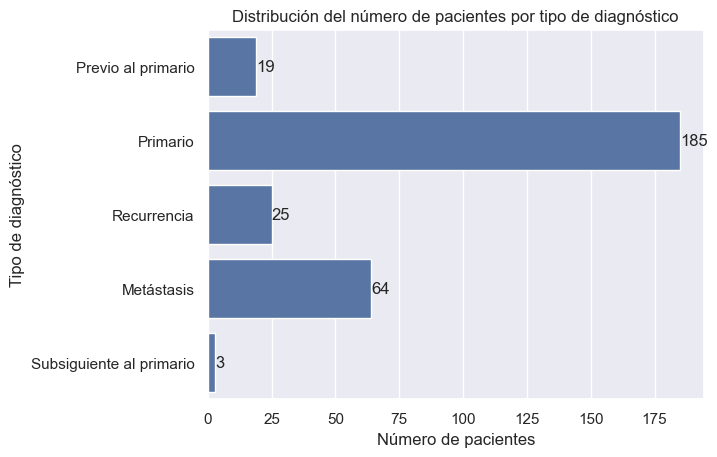

In [174]:
diagnosis_count = []
for col in diagnosis_type.columns[1:-1]:
      diagnosis_count.append(diagnosis_type[diagnosis_type[col] != 0].shape[0])

ax = sns.barplot(y=diagnosis_type.columns[1:-1], x=diagnosis_count)
ax.bar_label(ax.containers[0])

plt.xlabel('Número de pacientes')
plt.ylabel('Tipo de diagnóstico')
plt.title('Distribución del número de pacientes por tipo de diagnóstico')
plt.show()

## 6. Análisis exploratorio de treatment_ebrt

In [175]:
# Muestra de los datos.
treatment_ebrt['Outcome'] = pd.Categorical(treatment_ebrt['Outcome'],
                                            categories=['Progresión',
                                                        'Enfermedad estable',
                                                        'Respuesta completa'],
                                            ordered=True)

treatment_ebrt.head()

,Patient Id,Treatment Duration,Number Of Fractions,Treatment Anatomic Sites,Treatment Dose (cGy),Outcome
0,TCGA-FB-AAPP,166.0,25.0,Primary Tumor Field,4500.0,Progresión
1,TCGA-HZ-7289,467.0,NaN,Distant Site,4500.0,Progresión
2,TCGA-HZ-7920,120.0,28.0,Primary Tumor Field,5040.0,Respuesta completa
3,TCGA-F2-A44G,144.0,28.0,Primary Tumor Field,5440.0,Respuesta completa
4,TCGA-HZ-A49I,93.0,25.0,Primary Tumor Field,5040.0,Progresión


In [176]:
pg.normality(treatment_ebrt, dv='Treatment Dose (cGy)', group='Outcome')

C:\Users\carlo\AppData\Local\Programs\Python\Python313\Lib\site-packages\pingouin\distribution.py:242: UserWarning:

Group Enfermedad estable has less than 4 valid samples. Returning NaN.



,W,pval,normal
Outcome,,,
Progresión,0.748257,0.005175,False
Respuesta completa,0.692878,0.000312,False
Enfermedad estable,NaN,NaN,False


In [177]:
pg.mwu(treatment_ebrt[treatment_ebrt['Outcome'] == 'Progresión']['Treatment Dose (cGy)'],
       treatment_ebrt[treatment_ebrt['Outcome'] == 'Respuesta completa']['Treatment Dose (cGy)'],
       alternative='less')

,U-val,alternative,p-val,RBC,CLES
MWU,21.0,less,0.00336,-0.666667,0.833333


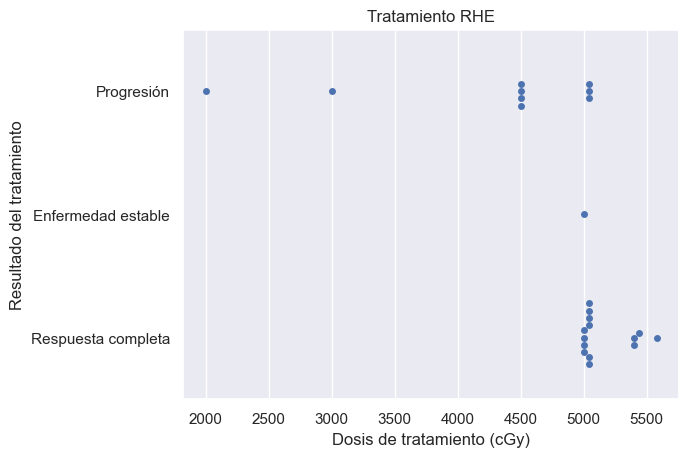

In [178]:
sns.swarmplot(data=treatment_ebrt, x='Treatment Dose (cGy)',
              y='Outcome')

plt.title('Tratamiento RHE')
plt.xlabel('Dosis de tratamiento (cGy)')
plt.ylabel('Resultado del tratamiento')

plt.show()

In [179]:
columns = ['Outcome', 'Treatment Anatomic Sites']

table_treatment_ebrt = TableOne(treatment_ebrt, columns=columns,
                                categorical=columns, pval=False,
                                missing=False)

print(table_treatment_ebrt.tabulate(tablefmt="fancy_grid"))

╒═════════════════════════════════╤═════════════════════╤═══════════╕
│                                 │                     │ Overall   │
╞═════════════════════════════════╪═════════════════════╪═══════════╡
│ n                               │                     │ 41        │
├─────────────────────────────────┼─────────────────────┼───────────┤
│ Outcome, n (%)                  │ Progresión          │ 10 (24.4) │
├─────────────────────────────────┼─────────────────────┼───────────┤
│                                 │ Enfermedad estable  │ 2 (4.9)   │
├─────────────────────────────────┼─────────────────────┼───────────┤
│                                 │ Respuesta completa  │ 14 (34.1) │
├─────────────────────────────────┼─────────────────────┼───────────┤
│                                 │ None                │ 15 (36.6) │
├─────────────────────────────────┼─────────────────────┼───────────┤
│ Treatment Anatomic Sites, n (%) │ Distant Site        │ 2 (4.9)   │
├───────────────────

## 7. Análisis exploratorio de treatment_chemo

In [180]:
# Muestra de los datos.
treatment_chemo['Outcome'] = pd.Categorical(treatment_chemo['Outcome'],
                                            categories=['Treatment Ongoing',
                                                        'Progressive Disease',
                                                        'Stable Disease',
                                                        'Partial Response',
                                                        'Complete Response'],
                                            ordered=True)
treatment_chemo.replace(np.nan, 0, inplace=True)

treatment_chemo.head()

,Patient Id,Outcome,Treatment Duration,Agents,Treatment Type
0,TCGA-2L-AAQA,Progressive Disease,126.0,Gemcitabine,Monoterapia
1,TCGA-2L-AAQE,Progressive Disease,0.0,Gemcitabine,Monoterapia
2,TCGA-2L-AAQI,Progressive Disease,72.0,Gemcitabine,Monoterapia
3,TCGA-2L-AAQJ,Progressive Disease,171.0,Gemcitabine,Monoterapia
4,TCGA-3A-A9I5,Complete Response,211.0,Fluorouracil Leucovorin Gemcitabine,Combinación


In [181]:
year = diagnosis_primary[['Patient Id', 'Year Of Diagnosis']].copy()
treatment_chemo = treatment_chemo.merge(year, on='Patient Id', how='left')
treatment_chemo['Year Of Diagnosis'] = treatment_chemo['Year Of Diagnosis'].astype(int)

Text(0.5, 1.0, 'Distribución de resultados de tratamiento')

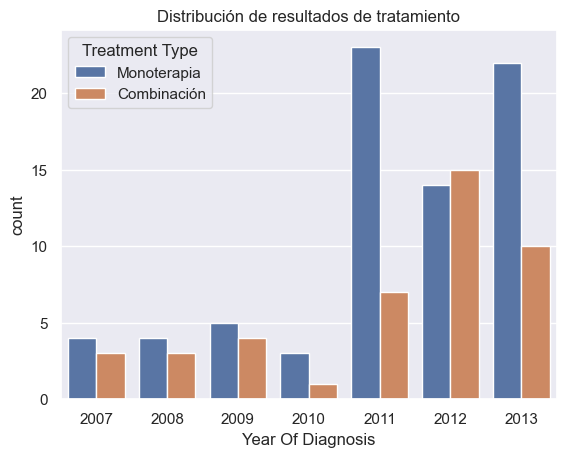

In [182]:
sns.countplot(data=treatment_chemo, x='Year Of Diagnosis', hue='Treatment Type')

plt.title('Distribución de resultados de tratamiento')

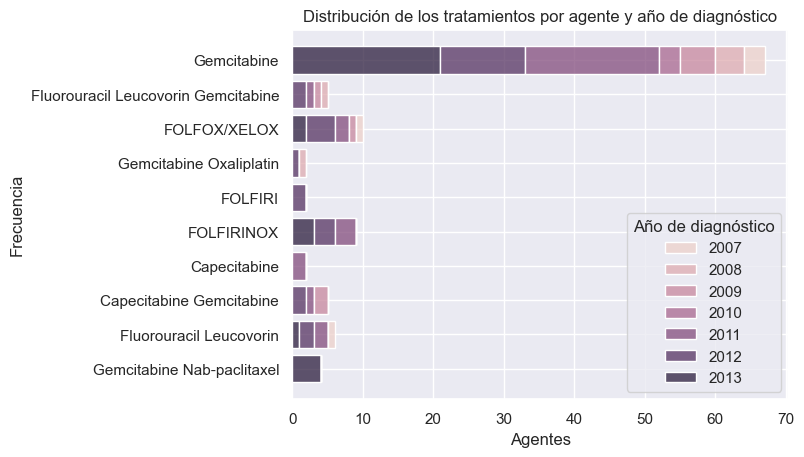

In [183]:
frequent_agents = treatment_chemo['Agents'].value_counts()
frequent_agents = frequent_agents[frequent_agents > 1].index

df = treatment_chemo[treatment_chemo['Agents'].isin(frequent_agents)].copy()
new_columns = list(df.columns)
new_columns[-1] = 'Año de diagnóstico'
df.columns = new_columns

sns.histplot(data=df, y='Agents', hue='Año de diagnóstico', multiple='stack', shrink=0.8)

plt.title('Distribución de los tratamientos por agente y año de diagnóstico')
plt.xlabel('Agentes')
plt.ylabel('Frecuencia')

plt.show()

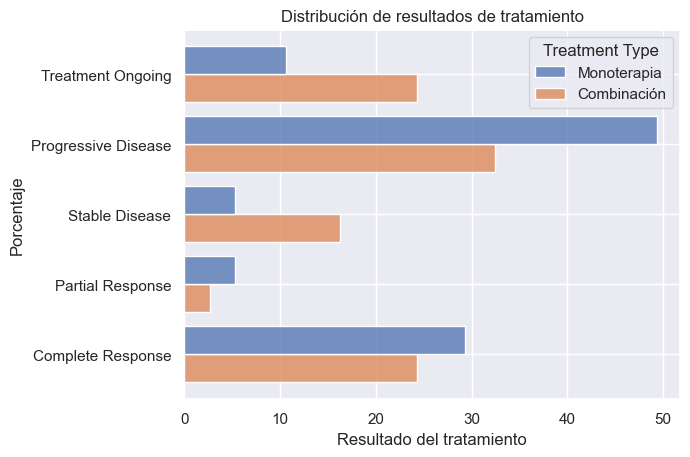

In [184]:
sns.histplot(data=treatment_chemo, y='Outcome', hue='Treatment Type',
             multiple='dodge', shrink=0.8, stat='percent', common_norm=False)


plt.title('Distribución de resultados de tratamiento')
plt.xlabel('Resultado del tratamiento')
plt.ylabel('Porcentaje')
plt.show()

In [185]:
table_chemo = TableOne(treatment_chemo, columns=['Outcome'],
                       groupby='Treatment Type', pval=False,
                       missing=False)

print(table_chemo.tabulate(tablefmt="fancy_grid"))

╒════════════════╤═════════════════════╤═══════════╤═══════════════╤═══════════════╕
│                │                     │ Overall   │ Combinación   │ Monoterapia   │
╞════════════════╪═════════════════════╪═══════════╪═══════════════╪═══════════════╡
│ n              │                     │ 118       │ 43            │ 75            │
├────────────────┼─────────────────────┼───────────┼───────────────┼───────────────┤
│ Outcome, n (%) │ Treatment Ongoing   │ 17 (14.4) │ 9 (20.9)      │ 8 (10.7)      │
├────────────────┼─────────────────────┼───────────┼───────────────┼───────────────┤
│                │ Progressive Disease │ 49 (41.5) │ 12 (27.9)     │ 37 (49.3)     │
├────────────────┼─────────────────────┼───────────┼───────────────┼───────────────┤
│                │ Stable Disease      │ 10 (8.5)  │ 6 (14.0)      │ 4 (5.3)       │
├────────────────┼─────────────────────┼───────────┼───────────────┼───────────────┤
│                │ Partial Response    │ 5 (4.2)   │ 1 (2.3)     

In [186]:
pg.normality(treatment_chemo, dv='Treatment Duration', group='Treatment Type')

,W,pval,normal
Treatment Type,,,
Monoterapia,0.766653,1.425539e-09,False
Combinación,0.825378,1.326757e-05,False


In [187]:
pg.mwu(treatment_chemo[treatment_chemo['Treatment Type'] == 'Monoterapia']['Treatment Duration'],
       treatment_chemo[treatment_chemo['Treatment Type'] == 'Combinación']['Treatment Duration'])

,U-val,alternative,p-val,RBC,CLES
MWU,1376.5,two-sided,0.186953,-0.146357,0.426822


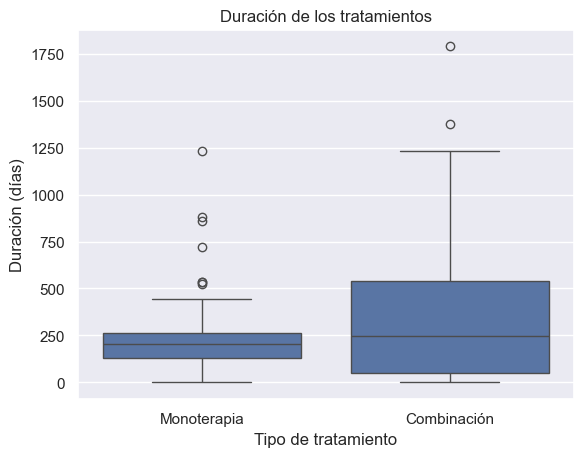

In [188]:
sns.boxplot(data=treatment_chemo, x='Treatment Type', y='Treatment Duration')

plt.title('Duración de los tratamientos')
plt.xlabel('Tipo de tratamiento')
plt.ylabel('Duración (días)')
plt.show()

## 8. Análisis exploratorio de treatment_type

In [189]:
# Muestra de los datos.
treatment_type.head()

,Patient Id,RHE,Quimioterapia,Adyuvante,Pancreatectomía,Cirugía,Terapia farmacológica,Radioterapia,Whipple,Otros,Total
0,TCGA-IB-7897,0,0,1,0,2,2,2,1,0,8
1,TCGA-HZ-8315,0,0,1,0,0,0,0,1,0,2
2,TCGA-HZ-8636,0,0,1,0,1,0,0,0,0,2
3,TCGA-IB-7888,0,2,1,0,1,1,1,1,0,7
4,TCGA-IB-7893,0,0,1,1,1,1,1,0,0,5


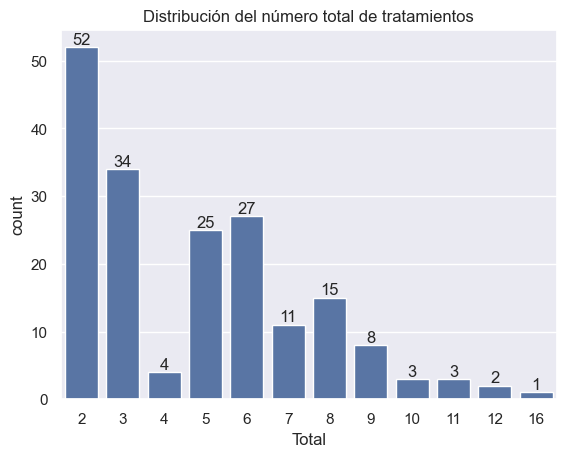

In [190]:
ax = sns.countplot(data=treatment_type, x='Total')
ax.bar_label(ax.containers[0])

plt.title('Distribución del número total de tratamientos')
plt.show()

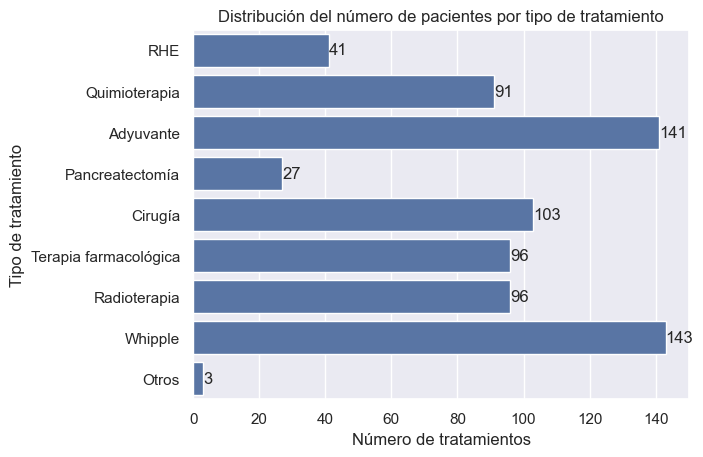

In [191]:
treatment_count = []
for col in treatment_type.columns[1:-1]:
      treatment_count.append(treatment_type[treatment_type[col] != 0].shape[0])

ax = sns.barplot(y=treatment_type.columns[1:-1], x=treatment_count)
ax.bar_label(ax.containers[0])

plt.xlabel('Número de tratamientos')
plt.ylabel('Tipo de tratamiento')
plt.title('Distribución del número de pacientes por tipo de tratamiento')
plt.show()

In [192]:
columns = ['Adyuvante', 'Pancreatectomía', 'Otros']

table_treatment_type = TableOne(treatment_type, columns=columns,
                                categorical=columns, pval=False,
                                missing=False)

table_treatment_type.to_csv(f'{table_path}/treatment_type.csv')

print(table_treatment_type.tabulate(tablefmt="fancy_grid"))

╒════════════════════════╤════╤════════════╕
│                        │    │ Overall    │
╞════════════════════════╪════╪════════════╡
│ n                      │    │ 185        │
├────────────────────────┼────┼────────────┤
│ Adyuvante, n (%)       │ 0  │ 44 (23.8)  │
├────────────────────────┼────┼────────────┤
│                        │ 1  │ 141 (76.2) │
├────────────────────────┼────┼────────────┤
│ Pancreatectomía, n (%) │ 0  │ 158 (85.4) │
├────────────────────────┼────┼────────────┤
│                        │ 1  │ 27 (14.6)  │
├────────────────────────┼────┼────────────┤
│ Otros, n (%)           │ 0  │ 182 (98.4) │
├────────────────────────┼────┼────────────┤
│                        │ 1  │ 3 (1.6)    │
╘════════════════════════╧════╧════════════╛


## 9. Análisis exploratorio de mutation

In [193]:
mutation_gene.set_index('Gene', inplace=True)
print(mutation_gene.shape)
mutation_gene.head(10)

(2317, 128)


,TCGA-3A-A9IU,TCGA-IB-7651,TCGA-2L-AAQA,TCGA-2J-AABF,TCGA-H8-A6C1,TCGA-XN-A8T5,TCGA-LB-A8F3,TCGA-FZ-5919,TCGA-HV-A7OL,TCGA-2J-AAB4,TCGA-2L-AAQI,TCGA-FB-A78T,TCGA-HZ-8637,TCGA-HZ-A8P0,TCGA-RB-AA9M,TCGA-IB-AAUR,TCGA-Q3-AA2A,TCGA-FB-AAQ1,TCGA-IB-8126,TCGA-IB-AAUN,TCGA-US-A776,TCGA-YB-A89D,TCGA-2L-AAQJ,TCGA-FB-AAPU,TCGA-IB-A5SP,TCGA-RB-A7B8,TCGA-FB-AAQ0,TCGA-IB-A5SO,TCGA-HV-A7OP,TCGA-LB-A7SX,TCGA-LB-A9Q5,TCGA-YY-A8LH,TCGA-3A-A9IS,TCGA-XN-A8T3,TCGA-HZ-A8P1,TCGA-HV-AA8V,TCGA-2J-AAB1,TCGA-XD-AAUI,TCGA-2J-AAB9,TCGA-2J-AABH,TCGA-2J-AABP,TCGA-3A-A9I5,TCGA-FZ-5921,TCGA-HZ-A77P,TCGA-IB-A5ST,TCGA-IB-AAUU,TCGA-3A-A9J0,TCGA-2L-AAQE,TCGA-3A-A9I9,TCGA-2J-AABO,TCGA-FZ-5920,TCGA-FB-A5VM,TCGA-RL-AAAS,TCGA-FB-AAQ6,TCGA-HZ-A77Q,TCGA-FZ-5923,TCGA-2J-AABE,TCGA-3A-A9IJ,TCGA-3A-A9IZ,TCGA-3A-A9IH,TCGA-IB-7885,TCGA-FB-AAPZ,TCGA-YH-A8SY,TCGA-HZ-A9TJ,TCGA-US-A77J,TCGA-3A-A9IO,TCGA-HV-AA8X,TCGA-F2-A7TX,TCGA-2J-AABA,TCGA-3E-AAAY,TCGA-FZ-5922,TCGA-IB-A5SQ,TCGA-IB-A6UG,TCGA-OE-A75W,TCGA-3A-A9IB,TCGA-IB-A5SS,TCGA-US-A77G,TCGA-S4-A8RO,TCGA-IB-A7M4,TCGA-2J-AAB8,TCGA-2J-AABV,TCGA-XD-AAUG,TCGA-Z5-AAPL,TCGA-FB-AAPS,TCGA-2L-AAQM,TCGA-HZ-A77O,TCGA-FB-AAPP,TCGA-FB-AAQ2,TCGA-2L-AAQL,TCGA-IB-A7LX,TCGA-IB-AAUQ,TCGA-XD-AAUL,TCGA-2J-AABU,TCGA-US-A779,TCGA-2J-AABT,TCGA-IB-AAUS,TCGA-F2-7273,TCGA-FB-AAPQ,TCGA-IB-AAUO,TCGA-FZ-5926,TCGA-HZ-7925,TCGA-US-A77E,TCGA-IB-7652,TCGA-F2-A8YN,TCGA-3A-A9IC,TCGA-IB-AAUM,TCGA-HZ-7918,TCGA-Q3-A5QY,TCGA-IB-A6UF,TCGA-3A-A9IX,TCGA-IB-AAUW,TCGA-2J-AABR,TCGA-IB-AAUP,TCGA-3E-AAAZ,TCGA-XD-AAUH,TCGA-3A-A9IL,TCGA-2J-AABK,TCGA-3A-A9IV,TCGA-IB-AAUV,TCGA-2J-AAB6,TCGA-3A-A9I7,TCGA-HZ-A49I,TCGA-FB-AAQ3,TCGA-FZ-5924,TCGA-F2-A44G,TCGA-3A-A9IR,Total,Total %
Gene,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KRAS,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,0,0,1,1,1,1,1,1,0,100,79.365079
TP53,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,0,1,0,1,0,0,1,0,1,1,1,0,0,81,64.285714
TTN,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,44,34.920635
MAMLD1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,28,22.222222
CDKN2A,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,27,21.428571
SMAD4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,26,20.634921
FAM47C,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,21,16.666667
MAGEC1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,16.666667
IRS1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,

In [194]:
diagnosis_primary.columns

Index(['Patient Id', 'Ajcc Pathologic Stage', 'Ajcc Pathologic T',
       'Ajcc Pathologic N', 'Ajcc Pathologic M', 'Primary Diagnosis',
       'Residual Disease', 'Sites Of Involvement', 'Tumor Grade',
       'Year Of Diagnosis', 'Lymph Nodes Positive',
       'Maximum Tumor Diameter (cm)', 'Ajcc Pathologic N 8th',
       'Ajcc Pathologic T 8th', 'Ajcc Pathologic Stage 8th', 'Gene Mutations'],
      dtype='object')

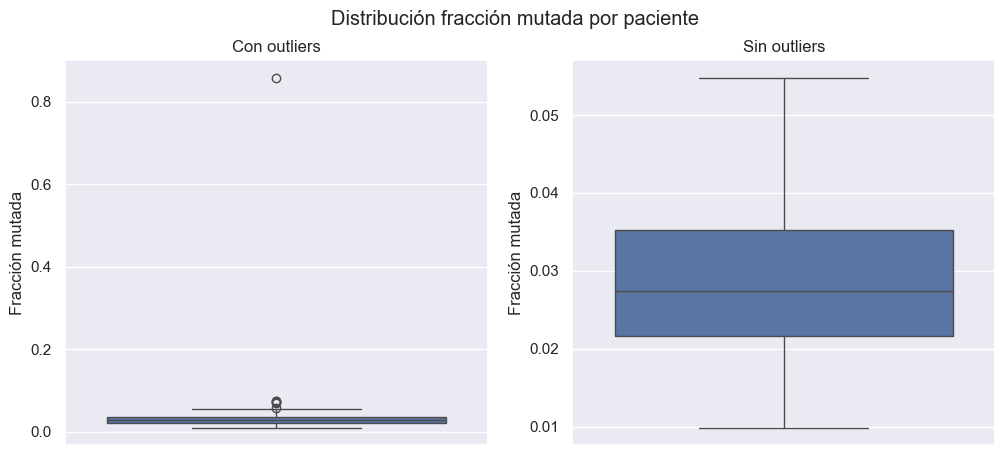

In [195]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=diagnosis_primary, y='Gene Mutations', ax=ax[0])
sns.boxplot(data=diagnosis_primary, y='Gene Mutations', ax=ax[1], showfliers=False)

ax[0].set_title('Con outliers')
ax[0].set_ylabel('Fracción mutada')

ax[1].set_title('Sin outliers')
ax[1].set_ylabel('Fracción mutada')

plt.suptitle('Distribución fracción mutada por paciente')

plt.show()

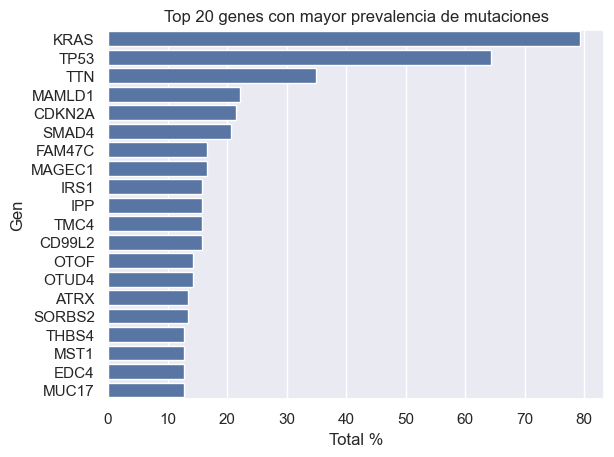

In [196]:
sns.barplot(data=mutation_gene.head(20), y='Gene', x='Total %')

plt.title('Top 20 genes con mayor prevalencia de mutaciones')
plt.ylabel('Gen')
plt.show()

In [197]:
def comutations(mutation, axis):
    comutation = mutation_gene.loc[:, mutation_gene.loc[mutation] == 1]\
      .loc[mutation_gene.index != mutation, :]\
      .sum(axis=1) * 100 / mutation_gene.loc[mutation, 'Total']

    comutation = comutation.sort_values(ascending=False).head(20)
    comutation = pd.DataFrame(comutation)
    comutation.columns = ['Total_co %']
    comutation['Total %'] = mutation_gene.loc[comutation.index, 'Total %']

    sns.barplot(y=comutation.index, x=comutation['Total_co %'], alpha=0.8, ax=axis, label='Co-mutaciones %')
    sns.barplot(y=comutation.index, x=comutation['Total %'], alpha=0.8, ax=axis, label='Total %')
    axis.legend()

    axis.set_title(f'{mutation}')
    axis.set_ylabel('Gen')
    axis.set_xlabel('Total % de co-mutaciones')

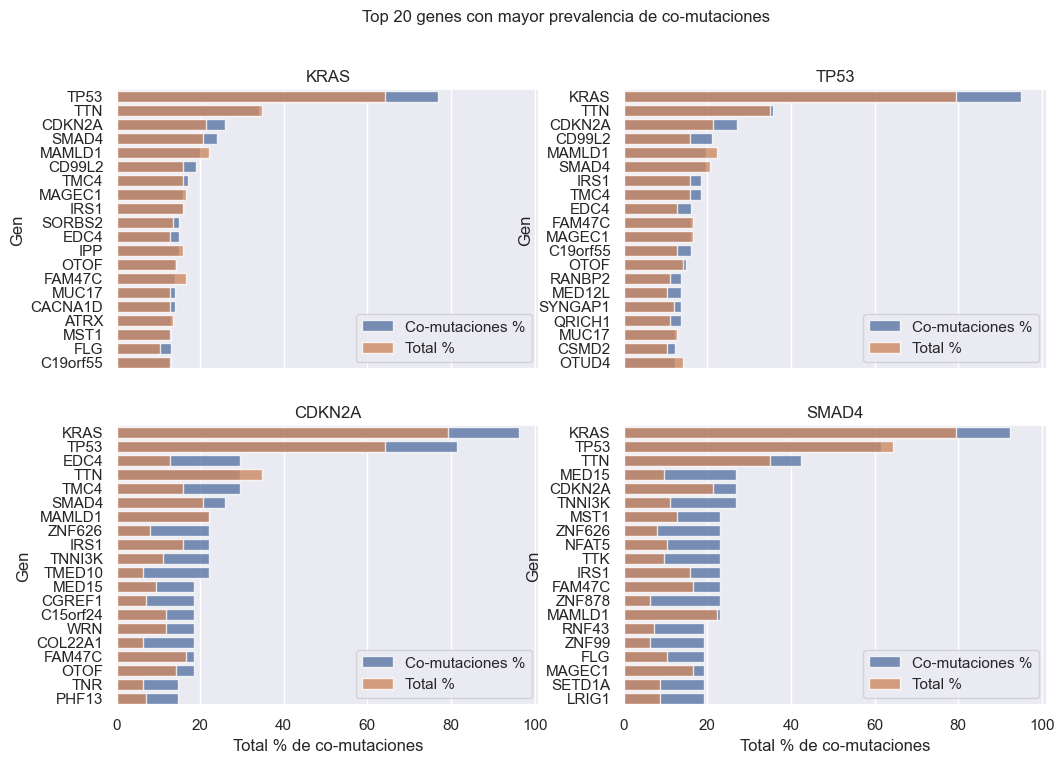

In [198]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

comutations('KRAS', ax[0, 0])
comutations('TP53', ax[0, 1])
comutations('CDKN2A', ax[1, 0])
comutations('SMAD4', ax[1, 1])

fig.suptitle('Top 20 genes con mayor prevalencia de co-mutaciones', fontsize=12)

plt.show()